In [2]:
import sys
import os

sys.path.insert(1, os.path.join(sys.path[0], '..')) 

In [3]:
import pickle

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
import yaml
from pathlib import Path
import math

import simulation
import stats

In [5]:
simulation_config_name = "simulation_config.yml"
simulation_config_folder = Path('../config')
simulation_config_path = simulation_config_folder / simulation_config_name

In [6]:
with open(simulation_config_path, "r") as f:
    cfg_load = yaml.safe_load(f)

In [7]:
cfg = cfg_load['simulation_config']
overhand_shuffle_cfg = cfg['overhand_shuffle']

In [8]:
RANDOM_SEED = cfg['random_seed'] 
N_TRIALS = overhand_shuffle_cfg['n_trials']
N_CARDS = overhand_shuffle_cfg['n_cards']
MAX_OVERHAND_SHUFFLES = overhand_shuffle_cfg['max_overhand_shuffles']
P = overhand_shuffle_cfg['p']

In [110]:
# set random seed for reproducable results
np.random.seed(RANDOM_SEED)

results = simulation.overhand_shuffle_simulation(
    n_trials=N_TRIALS,
    n_cards_in_deck=N_CARDS,
    max_n_shuffle=MAX_OVERHAND_SHUFFLES,
    p=P
    )

In [18]:
shuffles_2704 = stats.extract_decks_per_shuffle_number(results, 2704)
df = stats.create_frequency_matrix(shuffles_2704)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
1,98,89,103,91,95,118,91,107,107,89,...,97,94,101,104,92,101,99,92,97,94
2,93,90,105,93,84,105,100,102,106,110,...,90,104,86,95,107,90,82,80,116,90
3,101,100,96,99,80,106,93,105,79,107,...,107,107,93,100,81,93,103,92,90,105
4,86,88,90,88,104,95,102,106,124,95,...,98,108,114,109,85,101,99,80,105,101
5,99,109,96,94,99,100,108,91,93,84,...,97,90,96,104,100,99,100,105,82,91


In [19]:
prob_df = df / len(results)
prob_df.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
1,0.0196,0.0178,0.0206,0.0182,0.0190,0.0236,0.0182,0.0214,0.0214,0.0178,...,0.0194,0.0188,0.0202,0.0208,0.0184,0.0202,0.0198,0.0184,0.0194,0.0188
2,0.0186,0.0180,0.0210,0.0186,0.0168,0.0210,0.0200,0.0204,0.0212,0.0220,...,0.0180,0.0208,0.0172,0.0190,0.0214,0.0180,0.0164,0.0160,0.0232,0.0180
3,0.0202,0.0200,0.0192,0.0198,0.0160,0.0212,0.0186,0.0210,0.0158,0.0214,...,0.0214,0.0214,0.0186,0.0200,0.0162,0.0186,0.0206,0.0184,0.0180,0.0210
4,0.0172,0.0176,0.0180,0.0176,0.0208,0.0190,0.0204,0.0212,0.0248,0.0190,...,0.0196,0.0216,0.0228,0.0218,0.0170,0.0202,0.0198,0.0160,0.0210,0.0202
5,0.0198,0.0218,0.0192,0.0188,0.0198,0.0200,0.0216,0.0182,0.0186,0.0168,...,0.0194,0.0180,0.0192,0.0208,0.0200,0.0198,0.0200,0.0210,0.0164,0.0182


In [20]:
expected_value = 1 / len(results[0][0])
diff_from_expected_prob = prob_df - expected_value

In [21]:
diff_from_expected_prob

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
1,0.000369,-0.001431,0.001369,-0.001031,-0.000231,0.004369,-0.001031,0.002169,0.002169,-0.001431,...,0.000169,-0.000431,0.000969,0.001569,-0.000831,0.000969,0.000569,-0.000831,0.000169,-0.000431
2,-0.000631,-0.001231,0.001769,-0.000631,-0.002431,0.001769,0.000769,0.001169,0.001969,0.002769,...,-0.001231,0.001569,-0.002031,-0.000231,0.002169,-0.001231,-0.002831,-0.003231,0.003969,-0.001231
3,0.000969,0.000769,-0.000031,0.000569,-0.003231,0.001969,-0.000631,0.001769,-0.003431,0.002169,...,0.002169,0.002169,-0.000631,0.000769,-0.003031,-0.000631,0.001369,-0.000831,-0.001231,0.001769
4,-0.002031,-0.001631,-0.001231,-0.001631,0.001569,-0.000231,0.001169,0.001969,0.005569,-0.000231,...,0.000369,0.002369,0.003569,0.002569,-0.002231,0.000969,0.000569,-0.003231,0.001769,0.000969
5,0.000569,0.002569,-0.000031,-0.000431,0.000569,0.000769,0.002369,-0.001031,-0.000631,-0.002431,...,0.000169,-0.001231,-0.000031,0.001569,0.000769,0.000569,0.000769,0.001769,-0.002831,-0.001031
6,-0.000031,0.001769,-0.000031,0.000369,0.000569,-0.000431,-0.000631,0.000769,0.000969,0.001769,...,-0.000431,0.003769,-0.004231,0.000369,-0.001431,0.000769,0.000769,0.000569,0.000169,-0.001631
7,0.004769,-0.000631,-0.002631,-0.003431,-0.001631,-0.000631,-0.000231,-0.003431,0.002969,-0.001631,...,0.001569,-0.001631,-0.000631,0.000169,-0.000831,-0.001831,0.004569,-0.000631,0.000369,-0.000031
8,0.000169,0.002769,-0.001031,-0.002631,0.001169,-0.000631,-0.000631,-0.002431,0.000769,-0.000431,...,-0.000631,-0.000831,0.002369,0.001369,0.002569,0.000169,0.000769,0.004169,0.005569,0.002569
9,0.003569,-0.001031,-0.000231,0.000969,0.000569,-0.002831,-0.000231,0.000369,0.002569,0.002969,...,0.000369,0.001169,0.002369,-0.001231,-0.001231,-0.000831,-0.000231,-0.001031,-0.001231,0.002769
10,0.001569,-0.000831,0.003369,-0.003831,0.002169,-0.000031,-0.002031,0.001569,-0.003631,-0.003031,...,-0.002031,-0.002431,0.000969,0.000569,0.002369,0.001169,-0.000831,0.000769,-0.000031,-0.002631


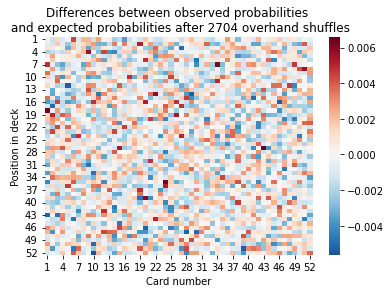

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Differences between observed probabilities \n and expected probabilities after 2704 overhand shuffles")
sns.heatmap(diff_from_expected_prob, center=0,cmap="RdBu_r")
ax.set_xlabel('Card number')
ax.set_ylabel('Position in deck')
plt.show()